In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the imaginary dataset showing if a person has kyphosis based on some atributes.

In [55]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


Check for null values.

In [56]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

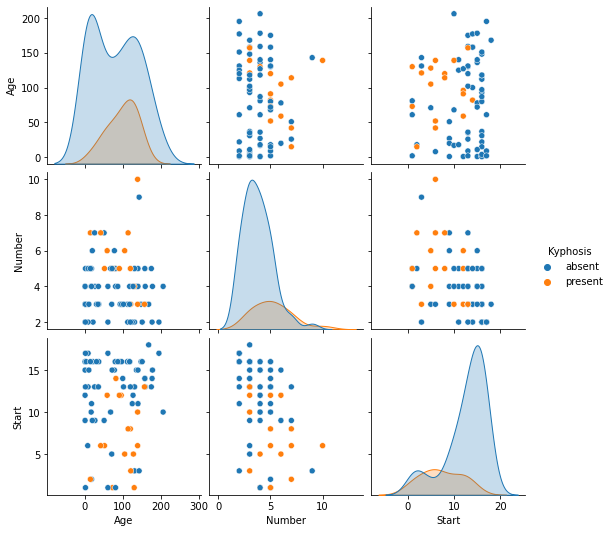

In [57]:
sns.pairplot(df, hue='Kyphosis')

# Build a Decision Tree

In [58]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [60]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
pred = dtree.predict(X_test)
pred

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[15  1]
 [ 0  1]]


              precision    recall  f1-score   support

      absent       1.00      0.94      0.97        16
     present       0.50      1.00      0.67         1

    accuracy                           0.94        17
   macro avg       0.75      0.97      0.82        17
weighted avg       0.97      0.94      0.95        17



## Build a Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [65]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [66]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[15  1]
 [ 0  1]]


              precision    recall  f1-score   support

      absent       1.00      0.94      0.97        16
     present       0.50      1.00      0.67         1

    accuracy                           0.94        17
   macro avg       0.75      0.97      0.82        17
weighted avg       0.97      0.94      0.95        17



As the dataset is pretty small, the random forest couldn't outshine the decision tree by as much.

## Lending Club

Import the lending data of about 10,000 users from LendingClub.com for the period 2007-2010.

In [81]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


Here are what some columns represent: <br>
    credit.polict = 1 if the customer meets the credit underwriting LendingClub.com, and 0 otherwise.
    <br>
    purpose = purpose of the loan 
    <br>
    int.rate = the interest rate of the loan

In [82]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

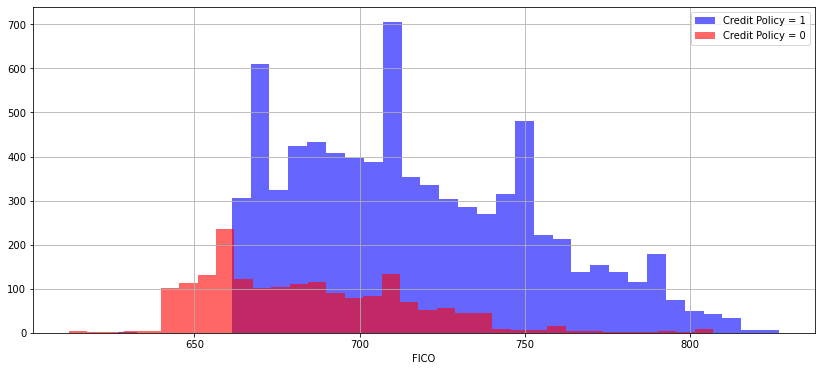

In [83]:
plt.figure(figsize=(14,6))
df[df['credit.policy'] == 1].fico.hist(bins=35, color='b', alpha=0.6, label='Credit Policy = 1')
df[df['credit.policy'] == 0].fico.hist(bins=35, color='r', alpha=0.6, label='Credit Policy = 0')
plt.xlabel('FICO')
plt.legend();

One thing we notice first is that the users with FICO score less than 650-660 never met the credit policy. <br>
Create a similar figure now for not.fully.paid column, which will be our label column.

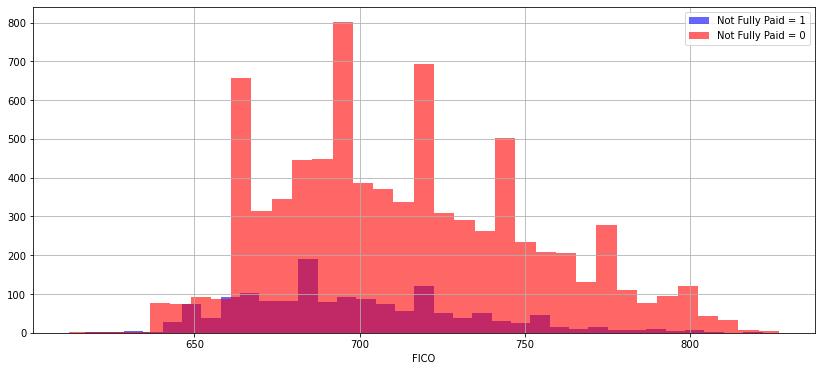

In [84]:
plt.figure(figsize=(14,6))
df[df['not.fully.paid'] == 1].fico.hist(bins=35, color='b', alpha=0.6, label='Not Fully Paid = 1')
df[df['not.fully.paid'] == 0].fico.hist(bins=35, color='r', alpha=0.6, label='Not Fully Paid = 0')
plt.xlabel('FICO')
plt.legend();

The majority of people were paying off their loans, and both fully.paid classes have similar distribution as opposed to the FICO vs. credit.policy distribution. We also can see that there are a multiple of spikes for various FICO scores. <br>
Now compare how much each purpose category could paid their loans back.

In [98]:
df.groupby(['not.fully.paid', 'purpose']).size()

not.fully.paid  purpose           
0               all_other             1944
                credit_card           1116
                debt_consolidation    3354
                educational            274
                home_improvement       522
                major_purchase         388
                small_business         447
1               all_other              387
                credit_card            146
                debt_consolidation     603
                educational             69
                home_improvement       107
                major_purchase          49
                small_business         172
dtype: int64

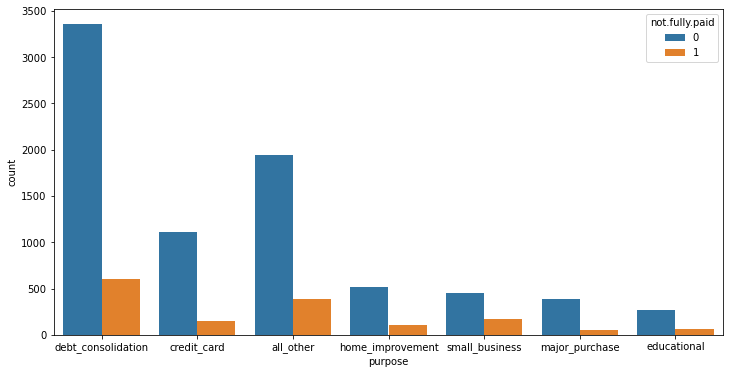

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid');

We can spot that the foremost reason for unpaid loans is the debt consolidation.

Let's see the trend between FICO scores and interest rates.

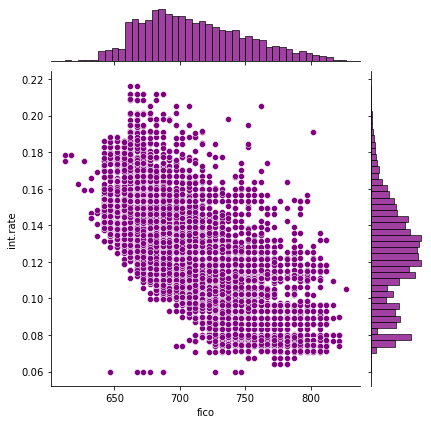

In [110]:
sns.jointplot(data=df, x='fico', y='int.rate', color='purple')

Interest rates get lower as fico score increases, and this makes sense as there is more credit for higher fico scores. <br>
Now create linear plots to see if the trend differs for not.fully.paid and credit.policy

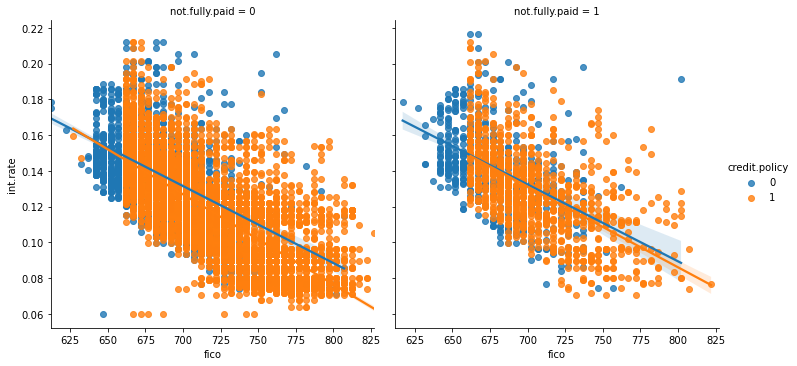

In [113]:
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

We notice that the behaviour is relatively same whether it is fully paid or not, or have zero credit score or 1.

Find how many values exists per purpose.

In [71]:
df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

Convert purpose values into dummy variables and add them to the dataframe as new columns.

In [114]:
purpose_dummy = pd.get_dummies(df.purpose, drop_first=True)
df = pd.concat((df, purpose_dummy), axis=1)

In [115]:
df.drop('purpose', axis=1, inplace=True)

How is the credit.policy distributed across the dataframe?

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

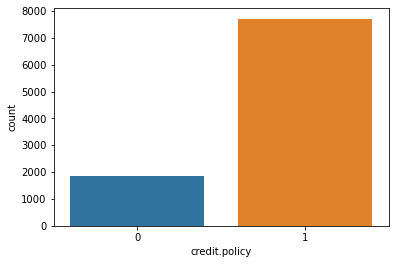

In [116]:
sns.countplot(data=df, x='credit.policy')

In [118]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [119]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
dtree = DecisionTreeClassifier()

In [121]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [122]:
pred = dtree.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[1356  242]
 [ 249   69]]


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1598
           1       0.22      0.22      0.22       318

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.74      0.74      0.74      1916



Now build a random forest.

In [131]:
rfc = RandomForestClassifier(n_estimators=500)

In [132]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [133]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
pred = dtree.predict(X_test)

print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[1595    3]
 [ 314    4]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1598
           1       0.57      0.01      0.02       318

    accuracy                           0.83      1916
   macro avg       0.70      0.51      0.47      1916
weighted avg       0.79      0.83      0.76      1916



The relatively lower precision score for not.fully.paid = 1 category makes sense as most of those users spread across different ranges in contrast to not.fully.paid = 1, which are generally clustered in a more tidy and tight pattern. Keep also in mind that the recall and f1-score for not.fully.paid = 1 is significantly lower than what it is in the decision tree. Choosing one model over another will depend on what we metrics we require to prioritise.